In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from itertools import cycle

#  1:Reading external dataset 

In [27]:
df=pd.read_csv("Fifa_world_cup_matches.csv")
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
pd.set_option("display.width", 1000)

In [28]:
df.head(3)

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,crosses team1,crosses team2,crosses completed team1,crosses completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,5,6,2,0,0,2,0,0,0,1,0,3,5,3,2,4,3,2,15,8,0,7,3,6,1,4,9,6,520,532,116,127,235,187,169,218,5,8,136,155,86,99,9,13,4,7,4,2,0,0,15,15,3,4,450,480,381,409,9,14,4,4,9,9,1,3,19,17,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,13,8,2,6,6,2,0,0,6,1,7,3,3,4,10,6,3,2,11,3,5,0,2,3,3,1,11,0,1061,212,207,53,386,86,468,73,16,4,238,101,178,45,25,7,16,4,0,2,0,0,9,14,2,2,809,224,730,154,23,8,7,1,12,3,8,0,16,10,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,14,9,2,0,0,2,0,0,0,1,3,3,8,5,7,5,7,4,12,11,4,2,2,2,4,7,13,20,502,506,123,117,230,191,149,198,15,14,151,162,89,96,22,22,15,10,2,1,0,0,13,13,2,1,383,438,313,374,19,25,7,8,9,6,6,7,14,14,0,0,9,15,0,0,63,73,263,251


In [23]:
df.shape

(54, 88)

In [58]:
df.columns

Index(['team1', 'team2', 'possession team1', 'possession team2', 'possession in contest', 'number of goals team1', 'number of goals team2', 'date', 'hour', 'category', 'total attempts team1', 'total attempts team2', 'conceded team1', 'conceded team2', 'goal inside the penalty area team1', 'goal inside the penalty area team2', 'goal outside the penalty area team1', 'goal outside the penalty area team2', 'assists team1', 'assists team2', 'on target attempts team1', 'on target attempts team2', 'off target attempts team1', 'off target attempts team2', 'attempts inside the penalty area team1', 'attempts inside the penalty area  team2', 'attempts outside the penalty area  team1', 'attempts outside the penalty area  team2', 'left channel team1', 'left channel team2', 'left inside channel team1', 'left inside channel team2', 'central channel team1', 'central channel team2', 'right inside channel team1', 'right inside channel team2', 'right channel team1', 'right channel team2',
       'total o

In [59]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  54 non-null     object
 1   team2                                                  54 non-null     object
 2   possession team1                                       54 non-null     object
 3   possession team2                                       54 non-null     object
 4   possession in contest                                  54 non-null     object
 5   number of goals team1                                  54 non-null     int64 
 6   number of goals team2                                  54 non-null     int64 
 7   date                                                   54 non-null     object
 8   hour                                                   54 non-

# data cleaning

In [118]:
#Changing date datatype from object to date
df['date'] = pd.to_datetime(df['date'])

In [61]:
df.select_dtypes(include=['object'])

,team1,team2,possession team1,possession team2,possession in contest,hour,category
0,QATAR,ECUADOR,42%,50%,8%,17 : 00,Group A
1,ENGLAND,IRAN,72%,19%,9%,14 : 00,Group B
2,SENEGAL,NETHERLANDS,44%,45%,11%,17 : 00,Group A
3,UNITED STATES,WALES,51%,39%,10%,20 : 00,Group B
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,11 : 00,Group C
5,DENMARK,TUNISIA,55%,33%,12%,14 : 00,Group D
6,MEXICO,POLAND,54%,31%,15%,17 : 00,Group C
7,FRANCE,AUSTRALIA,56%,35%,9%,20 : 00,Group D
8,MOROCCO,CROATIA,32%,57%,12%,11 : 00,Group F
9,GERMANY,JAPAN,65%,22%,13%,14 : 00,Group E


In [119]:
df.dtypes

team1                                                    string[python]
team2                                                    string[python]
possession team1                                                  int32
possession team2                                                  int32
possession in contest                                            object
number of goals team1                                             int64
number of goals team2                                             int64
date                                                     datetime64[ns]
hour                                                             object
category                                                 string[python]
total attempts team1                                              int64
total attempts team2                                              int64
conceded team1                                                    int64
conceded team2                                                  

In [62]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   team1                                                  54 non-null     object        
 1   team2                                                  54 non-null     object        
 2   possession team1                                       54 non-null     object        
 3   possession team2                                       54 non-null     object        
 4   possession in contest                                  54 non-null     object        
 5   number of goals team1                                  54 non-null     int64         
 6   number of goals team2                                  54 non-null     int64         
 7   date                                                   54 non-null     da

In [63]:
df = df.astype({"team1": "string", "team2": "string","category":"string"})
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   team1                                                  54 non-null     string        
 1   team2                                                  54 non-null     string        
 2   possession team1                                       54 non-null     object        
 3   possession team2                                       54 non-null     object        
 4   possession in contest                                  54 non-null     object        
 5   number of goals team1                                  54 non-null     int64         
 6   number of goals team2                                  54 non-null     int64         
 7   date                                                   54 non-null     da

In [64]:
df['possession team1'] = df['possession team1'].str.replace('%','').astype(int)
df['possession team2'] = df['possession team2'].str.replace('%','').astype(int)

In [65]:
df.dtypes

team1                                                    string[python]
team2                                                    string[python]
possession team1                                                  int32
possession team2                                                  int32
possession in contest                                            object
number of goals team1                                             int64
number of goals team2                                             int64
date                                                     datetime64[ns]
hour                                                             object
category                                                 string[python]
total attempts team1                                              int64
total attempts team2                                              int64
conceded team1                                                    int64
conceded team2                                                  

# Task 2:Inspecting missing values in datasets

In [66]:
df.isnull().sum().sort_values(ascending=False)

team1                                                    0
team2                                                    0
passes team1                                             0
offsides team2                                           0
offsides team1                                           0
fouls against team2                                      0
fouls against team1                                      0
red cards team2                                          0
red cards team1                                          0
yellow cards team2                                       0
yellow cards team1                                       0
completed defensive line breaks team2                    0
completed defensive line breaksteam1                     0
attempted defensive line breaks team2                    0
attempted defensive line breaks team1                    0
completed line breaks team2                              0
completed line breaksteam1                              

In [120]:
#No Null value
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

team1                                                    0.0
fouls against team2                                      0.0
red cards team2                                          0.0
red cards team1                                          0.0
yellow cards team2                                       0.0
yellow cards team1                                       0.0
completed defensive line breaks team2                    0.0
completed defensive line breaksteam1                     0.0
attempted defensive line breaks team2                    0.0
attempted defensive line breaks team1                    0.0
completed line breaks team2                              0.0
completed line breaksteam1                               0.0
attempted line breaks team2                              0.0
attempted line breaks team1                              0.0
receptions between midfield and defensive lines team2    0.0
receptions between midfield and defensive lines team1    0.0
infront offers to receiv

# Task 3:Remove unwanted column

In [67]:
df.drop(columns=['own goals team1','own goals team2','crosses team1','crosses team2','crosses completed team1','crosses completed team2'], inplace=True)
df.shape

(54, 82)

# Analys

In [ ]:
df.describe()

In [ ]:
mean_number_of_goals_team1=df['number of goals team1'].mean()
mean_number_of_goals_team2=df['number of goals team2'].mean()
median_number_of_goals_team1=df['number of goals team1'].median()
median_number_of_goals_team2=df['number of goals team2'].median()
print("number of goals team1;",mean_number_of_goals_team1)
print("number of goals team2;",mean_number_of_goals_team2)
print("number of goals team1;",median_number_of_goals_team1)
print("number of goals team2;",median_number_of_goals_team2)

# Analysis

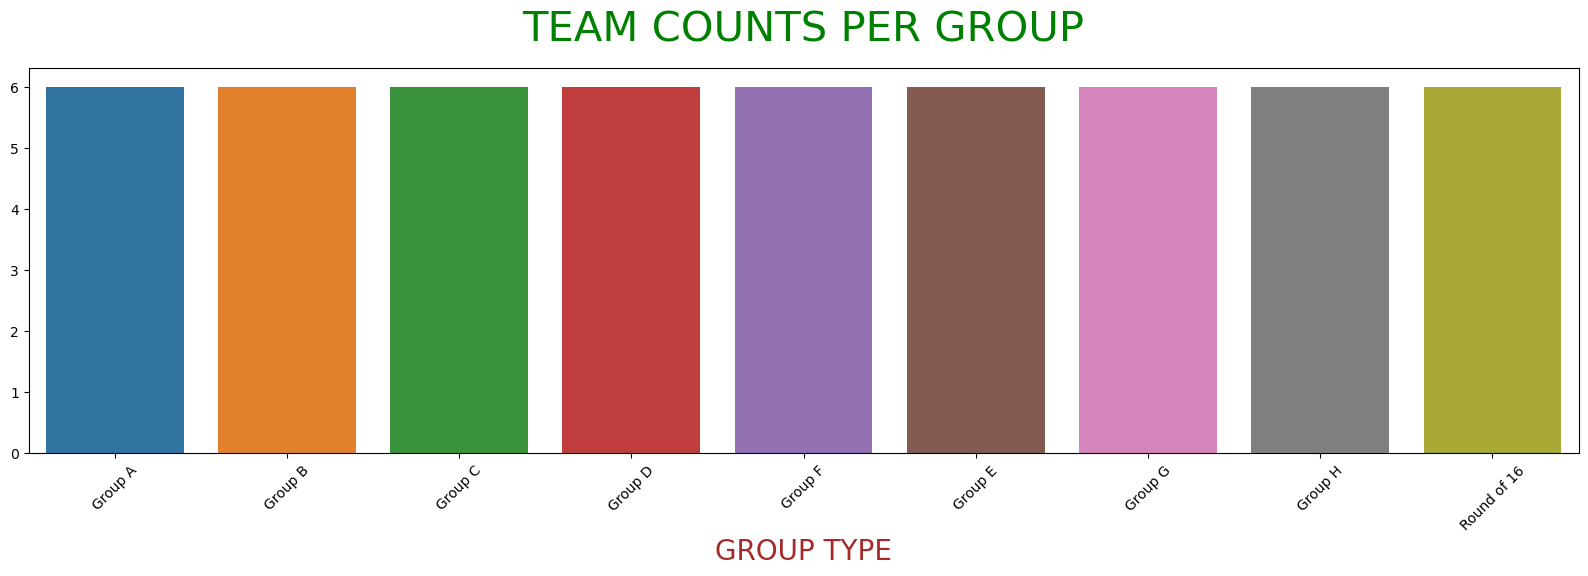

In [8]:
plt.figure(figsize=[20,5])

sns.barplot(x=df.category.value_counts().index, 
            y=df.category.value_counts().values).set_title("TEAM COUNTS PER GROUP", 
                                                                          fontsize=30, color='Green', pad = 20)

plt.xlabel('GROUP TYPE', fontsize= 20, color='Brown')
plt.xticks(rotation=45)

plt.show()

# Countries participated in FIFA Match

In [9]:
pd.unique(df[['team1', 'team2']].values.ravel('K'))

array(['QATAR', 'ENGLAND', 'SENEGAL', 'UNITED STATES', 'ARGENTINA',
       'DENMARK', 'MEXICO', 'FRANCE', 'MOROCCO', 'GERMANY', 'SPAIN',
       'BELGIUM', 'SWITZERLAND', 'URUGUAY', 'PORTUGAL', 'BRAZIL', 'WALES',
       'NETHERLANDS', 'TUNISIA', 'POLAND', 'JAPAN', 'CROATIA', 'CAMEROON',
       'KOREA REPUBLIC', 'ECUADOR', 'IRAN', 'AUSTRALIA', 'SAUDI ARABIA',
       'CANADA', 'COSTA RICA', 'GHANA', 'SERBIA'], dtype=object)

# how many team are present per category

<function matplotlib.pyplot.show(close=None, block=None)>

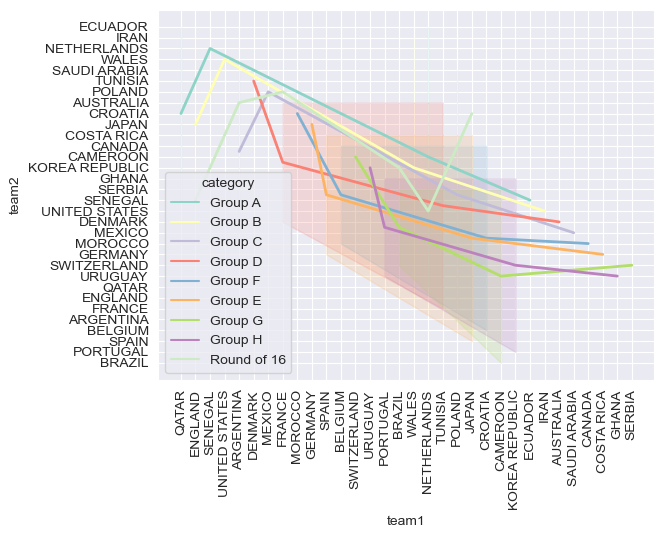

<Figure size 1500x1000 with 0 Axes>

In [121]:
sns.lineplot(x="team1",y="team2",data=df,c = 'Green',linewidth = '2',hue='category')
plt.xticks(rotation = 90)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.show

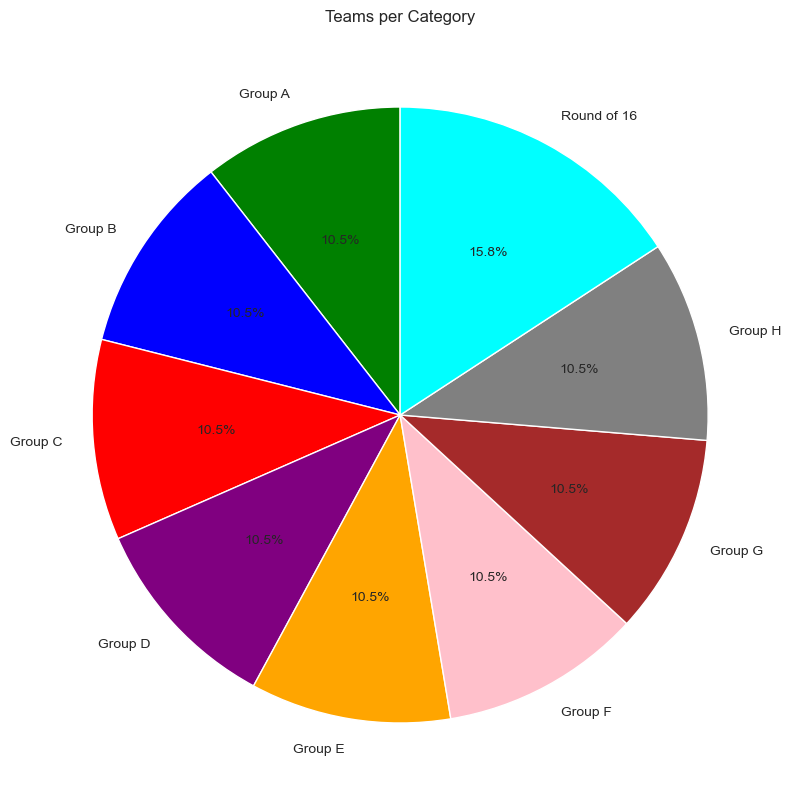

In [122]:
plt.figure(figsize=(10, 10))

# Get unique categories and set up a color cycle
categories = df['category'].unique()
colors = ['Green', 'Blue', 'Red', 'Purple', 'Orange', 'Pink', 'Brown', 'Gray', 'Cyan']

# Count teams for each category
team_counts = df.groupby('category')['team1'].nunique()

# Plot as a pie chart
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Customize the plot
plt.title('Teams per Category')
plt.show()

#  which country from team1 played match against which country per catergory

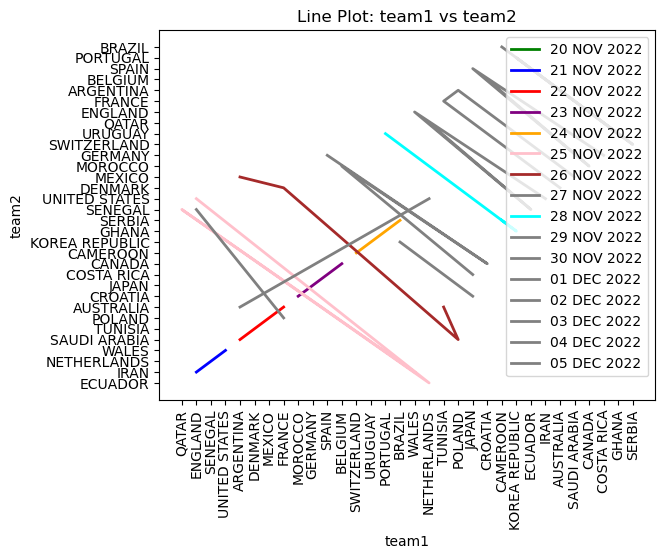

In [10]:
# plt.figure(figsize=(15, 15))

# Get unique dates and set up a color cycle
dates = df['date'].unique()
colors = ['Green', 'Blue', 'Red', 'Purple', 'Orange', 'Pink', 'Brown', 'Gray', 'Cyan']

# Set up a color dictionary for mapping dates to colors
color_dict = dict(zip(dates, colors))

# Iterate through unique dates and plot lines with different colors
for date in dates:
    subset_df = df[df['date'] == date]
    color = color_dict.get(date, 'Gray')  # Default to Gray if date not found in the color_dict
    plt.plot(subset_df['team1'], subset_df['team2'], label=date, linewidth=2, color=color)

# Customize the plot
plt.title('Line Plot: team1 vs team2')
plt.xlabel('team1')
plt.ylabel('team2')
plt.legend()
plt.xticks(rotation=90)

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

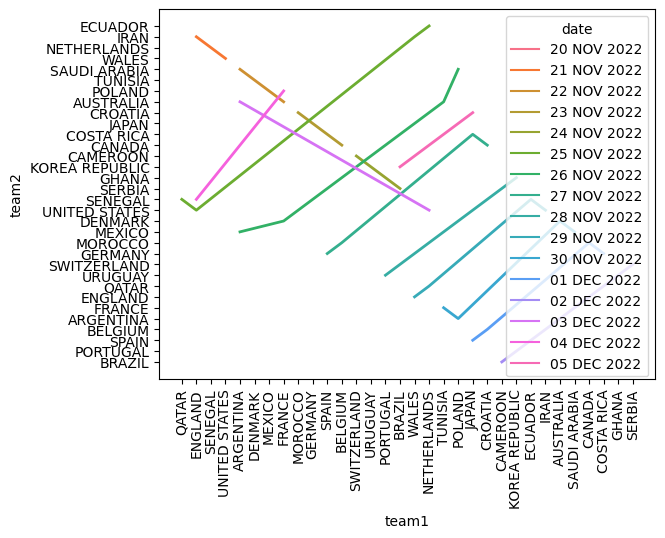

<Figure size 1500x1500 with 0 Axes>

In [11]:
sns.lineplot(x="team1",y="team2",data=df,c = 'Green',linewidth = '2',hue='date')
plt.xticks(rotation = 90)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.show

# Analysing Team 1 Info

In [12]:
team1=[x for x in df.columns if "team1" in x]
team1

['team1',
 'possession team1',
 'number of goals team1',
 'total attempts team1',
 'conceded team1',
 'goal inside the penalty area team1',
 'goal outside the penalty area team1',
 'assists team1',
 'on target attempts team1',
 'off target attempts team1',
 'attempts inside the penalty area team1',
 'attempts outside the penalty area  team1',
 'left channel team1',
 'left inside channel team1',
 'central channel team1',
 'right inside channel team1',
 'right channel team1',
 'total offers to receive team1',
 'inbehind offers to receive team1',
 'inbetween offers to receive team1',
 'infront offers to receive team1',
 'receptions between midfield and defensive lines team1',
 'attempted line breaks team1',
 'completed line breaksteam1',
 'attempted defensive line breaks team1',
 'completed defensive line breaksteam1',
 'yellow cards team1',
 'red cards team1',
 'fouls against team1',
 'offsides team1',
 'passes team1',
 'passes completed team1',
 'crosses team1',
 'crosses completed team

In [85]:
team1_df = df[team1].copy()
team1_df

,team1,possession team1,number of goals team1,total attempts team1,conceded team1,goal inside the penalty area team1,goal outside the penalty area team1,assists team1,on target attempts team1,off target attempts team1,attempts inside the penalty area team1,attempts outside the penalty area team1,left channel team1,left inside channel team1,central channel team1,right inside channel team1,right channel team1,total offers to receive team1,inbehind offers to receive team1,inbetween offers to receive team1,infront offers to receive team1,receptions between midfield and defensive lines team1,attempted line breaks team1,completed line breaksteam1,attempted defensive line breaks team1,completed defensive line breaksteam1,yellow cards team1,red cards team1,fouls against team1,offsides team1,passes team1,passes completed team1,switches of play completed team1,corners team1,free kicks team1,penalties scored team1,goal preventions team1,forced turnovers team1,defensive pressures applied team1
0,QATAR,42,0,5,2,0,0,0,0,5,2,3,15,0,3,1,9,520,116,235,169,5,136,86,9,4,4,0,15,3,450,381,9,1,19,0,6,52,256
1,ENGLAND,72,6,13,2,6,0,6,7,3,10,3,11,5,2,3,11,1061,207,386,468,16,238,178,25,16,0,0,9,2,809,730,12,8,16,0,8,63,139
2,SENEGAL,44,0,14,2,0,0,0,3,8,7,7,12,4,2,4,13,502,123,230,149,15,151,89,22,15,2,0,13,2,383,313,9,6,14,0,9,63,263
3,UNITED STATES,51,1,6,1,1,0,1,1,4,4,2,14,5,4,4,11,725,149,336,240,12,199,146,23,15,4,0,15,1,569,509,5,5,11,0,7,81,242
4,ARGENTINA,64,1,14,2,1,0,0,6,5,10,4,12,4,5,8,18,650,157,177,316,26,191,127,39,25,0,0,7,10,610,529,5,9,22,1,4,65,163
5,DENMARK,55,0,11,0,0,0,0,4,4,7,4,17,4,7,6,18,681,152,276,253,14,190,136,21,12,2,0,9,1,594,523,11,11,11,0,11,76,226
6,MEXICO,54,0,13,0,0,0,0,4,5,10,3,20,6,1,3,27,547,128,202,217,20,170,117,32,19,2,0,14,3,485,422,9,6,16,0,8,61,193
7,FRANCE,56,4,22,1,4,0,4,7,9,18,4,30,6,3,8,19,691,150,182,359,26,173,135,32,27,0,0,5,0,734,672,6,8,11,0,4,64,250
8,MOROCCO,32,0,8,0,0,0,0,2,0,3,5,8,1,6,0,11,498,106,193,199,4,142,81,10,4,1,0,17,0,360,290,6,0,12,0,7,87,391
9,GERMANY,65,1,25,2,1,0,0,9,11,15,10,24,9,14,5,21,865,199,366,300,19,241,185,23,20,0,0,6,4,820,743,4,6,17,1,12,55,164


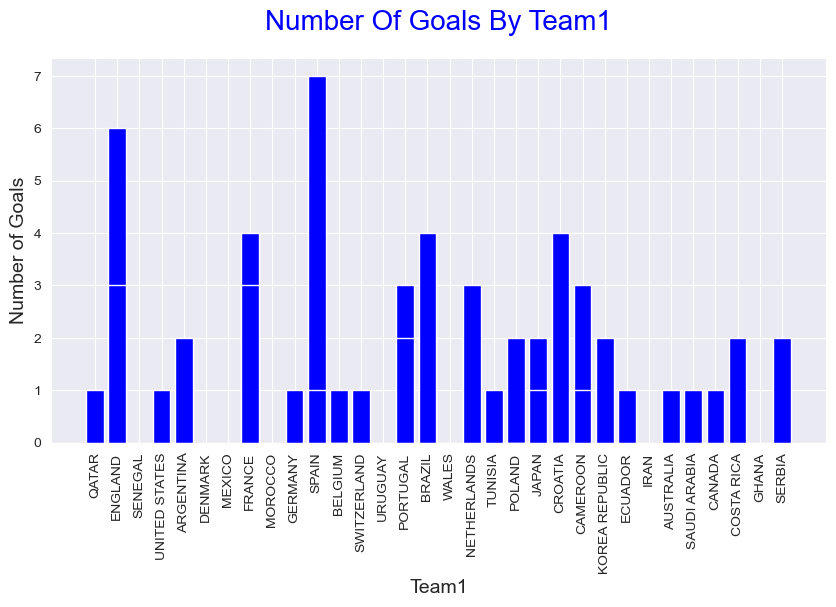

In [104]:
plt.figure(figsize=(10, 5))

# Create a bar plot
plt.bar(team1_df["team1"], team1_df["number of goals team1"], color='Blue')

# Customize the plot
plt.title("Number Of Goals By Team1", fontsize=20, color='Blue', pad=20)
plt.xlabel("Team1", fontsize=14)
plt.ylabel("Number of Goals", fontsize=14)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [87]:
team2=[x for x in df.columns if "team2" in x]
team2_df = df[team2].copy()
team2_df

,team2,possession team2,number of goals team2,total attempts team2,conceded team2,goal inside the penalty area team2,goal outside the penalty area team2,assists team2,on target attempts team2,off target attempts team2,attempts inside the penalty area team2,attempts outside the penalty area team2,left channel team2,left inside channel team2,central channel team2,right inside channel team2,right channel team2,total offers to receive team2,inbehind offers to receive team2,inbetween offers to receive team2,infront offers to receive team2,receptions between midfield and defensive lines team2,attempted line breaks team2,completed line breaks team2,attempted defensive line breaks team2,completed defensive line breaks team2,yellow cards team2,red cards team2,fouls against team2,offsides team2,passes team2,passes completed team2,switches of play completed team2,corners team2,free kicks team2,penalties scored team2,goal preventions team2,forced turnovers team2,defensive pressures applied team2
0,ECUADOR,50,2,6,0,2,0,1,3,3,4,2,8,7,6,4,6,532,127,187,218,8,155,99,13,7,2,0,15,4,480,409,9,3,17,1,5,72,279
1,IRAN,19,2,8,6,2,0,1,3,4,6,2,3,0,3,1,0,212,53,86,73,4,101,45,7,4,2,0,14,2,224,154,3,0,10,1,13,72,416
2,NETHERLANDS,45,2,9,0,2,0,1,3,5,5,4,11,2,2,7,20,506,117,191,198,14,162,96,22,10,1,0,13,1,438,374,6,7,14,0,15,73,251
3,WALES,39,1,7,1,1,0,0,3,3,5,2,7,2,5,2,7,436,100,172,164,9,174,103,17,8,2,0,10,1,409,321,8,3,15,1,7,72,292
4,SAUDI ARABIA,24,2,3,1,2,0,1,2,0,3,0,3,2,3,3,8,268,69,131,68,9,137,68,15,7,6,0,21,1,267,190,7,2,16,0,14,80,361
5,TUNISIA,33,0,11,0,0,0,0,1,7,6,5,9,2,2,3,6,477,89,204,184,7,174,85,17,6,1,0,10,1,387,302,1,9,10,0,11,73,287
6,POLAND,31,0,8,0,0,0,0,1,4,7,1,8,6,6,4,13,296,72,101,123,3,150,82,12,2,1,0,16,0,322,241,1,5,16,0,15,70,290
7,AUSTRALIA,35,1,4,4,1,0,1,1,3,2,2,11,2,5,1,9,521,95,208,218,7,133,84,15,7,3,0,11,0,466,399,5,1,5,0,22,56,316
8,CROATIA,57,0,6,0,0,0,0,2,2,4,2,12,3,6,5,7,626,99,197,330,9,169,116,18,9,0,0,11,1,667,592,7,5,17,0,8,58,217
9,JAPAN,22,2,10,1,2,0,1,3,6,10,0,5,0,3,3,11,346,102,146,98,10,113,70,17,11,0,0,14,4,261,207,2,6,10,0,26,87,487


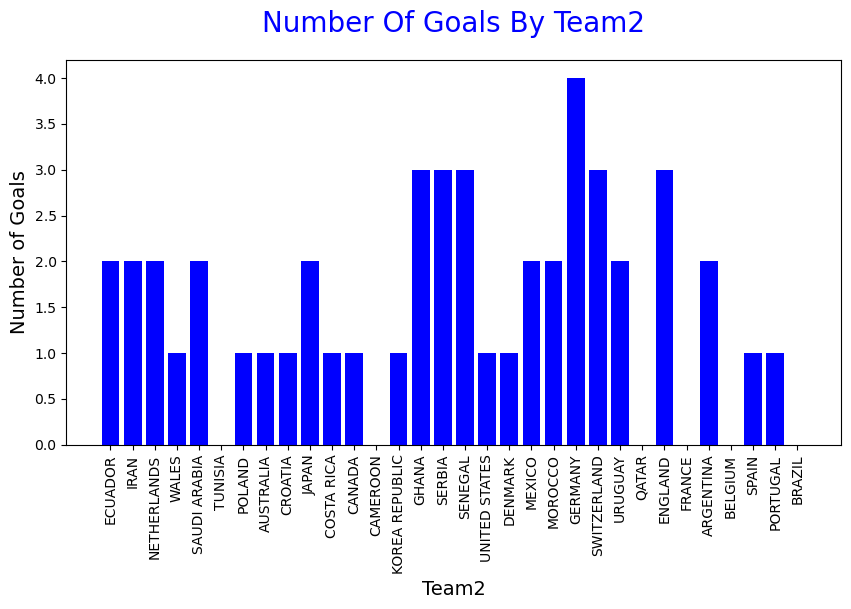

In [88]:
plt.figure(figsize=(10, 5))

# Create a bar plot
plt.bar(team2_df["team2"], team2_df["number of goals team2"], color='Blue')

# Customize the plot
plt.title("Number Of Goals By Team2", fontsize=20, color='Blue', pad=20)
plt.xlabel("Team2", fontsize=14)
plt.ylabel("Number of Goals", fontsize=14)
plt.xticks(rotation=90)

# Show the plot
plt.show()

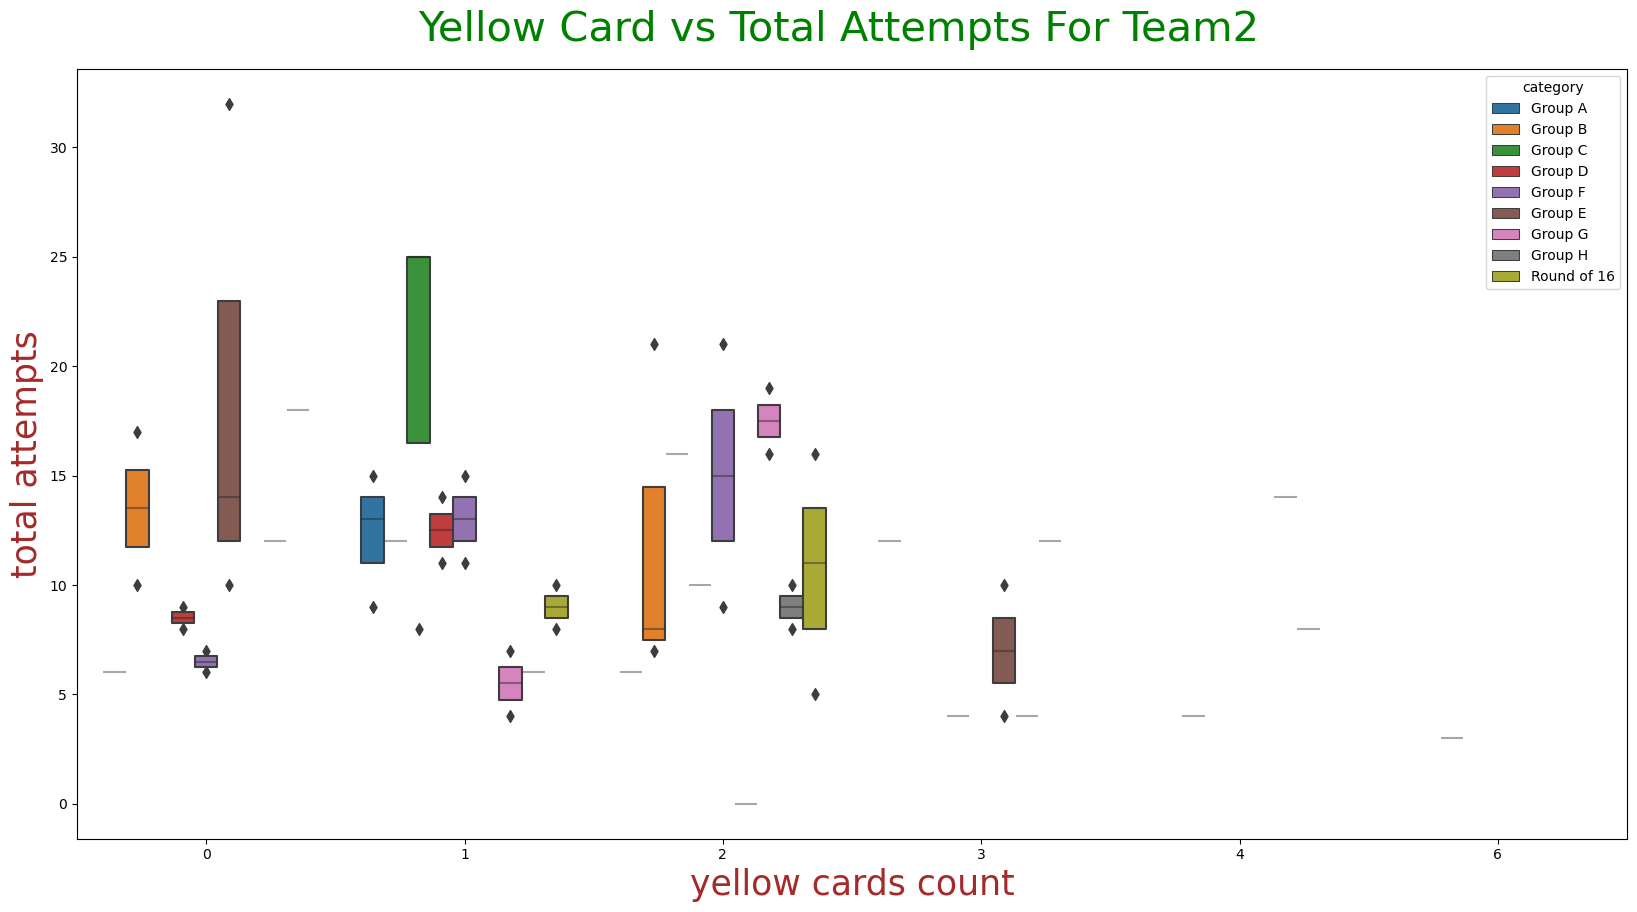

In [30]:
#Yellow card Vs total attempts team2

plt.figure(figsize=[20,10])

sns.boxenplot(x = df['yellow cards team2'] , y = df['total attempts team2'] , 
            hue = df['category']).set_title("Yellow Card vs Total Attempts For Team2  " , fontsize=30, color='Green', pad=20)
plt.xlabel("yellow cards count", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("total attempts", fontdict={'fontsize': 25, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

In [90]:
GroupA=df.loc[df.category == 'Group A']
GroupA

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42,50,8%,0,2,2022-11-20,17 : 00,Group A,5,6,2,0,0,2,0,0,0,1,0,3,5,3,2,4,3,2,15,8,0,7,3,6,1,4,9,6,520,532,116,127,235,187,169,218,5,8,136,155,86,99,9,13,4,7,4,2,0,0,15,15,3,4,450,480,381,409,9,9,1,3,19,17,0,1,6,5,52,72,256,279
2,SENEGAL,NETHERLANDS,44,45,11%,0,2,2022-11-21,17 : 00,Group A,14,9,2,0,0,2,0,0,0,1,3,3,8,5,7,5,7,4,12,11,4,2,2,2,4,7,13,20,502,506,123,117,230,191,149,198,15,14,151,162,89,96,22,22,15,10,2,1,0,0,13,13,2,1,383,438,313,374,9,6,6,7,14,14,0,0,9,15,63,73,263,251
17,QATAR,SENEGAL,42,48,10%,1,3,2022-11-25,14 : 00,Group A,10,12,3,1,1,3,0,0,1,2,2,4,7,6,4,10,6,2,7,26,5,4,2,6,5,4,11,18,511,553,109,136,199,190,203,227,9,12,174,184,117,113,13,19,7,9,3,3,0,0,7,12,4,3,424,511,353,445,12,9,6,7,15,11,0,0,12,11,67,67,308,232
18,NETHERLANDS,ECUADOR,48,39,13%,1,1,2022-11-25,17 : 00,Group A,2,13,1,1,0,1,1,0,1,0,1,5,1,3,0,8,2,5,8,10,8,5,2,2,4,5,11,4,632,541,129,86,267,276,236,179,4,12,168,155,115,84,9,22,4,10,0,1,0,0,15,12,1,4,524,425,451,345,6,2,2,5,16,16,0,0,14,2,85,52,254,279
32,NETHERLANDS,QATAR,54,38,8%,2,0,2022-11-29,16 : 00,Group A,13,6,0,2,2,0,0,0,1,0,4,4,5,2,10,2,3,4,25,10,9,7,8,5,11,4,21,6,785,574,157,100,322,245,306,229,16,11,185,161,165,107,13,15,10,10,1,0,0,0,19,9,4,0,795,459,740,394,1,10,4,2,9,24,0,0,5,14,62,52,319,322
33,ECUADOR,SENEGAL,51,32,17%,1,2,2022-11-29,16 : 00,Group A,8,15,2,1,1,2,0,0,1,0,4,5,3,8,5,11,3,4,13,14,3,0,1,2,6,7,6,10,453,268,83,76,174,115,196,77,2,12,146,153,77,84,10,20,2,12,0,1,0,0,23,11,0,3,432,269,353,198,1,6,3,6,14,22,0,1,15,8,59,62,190,243


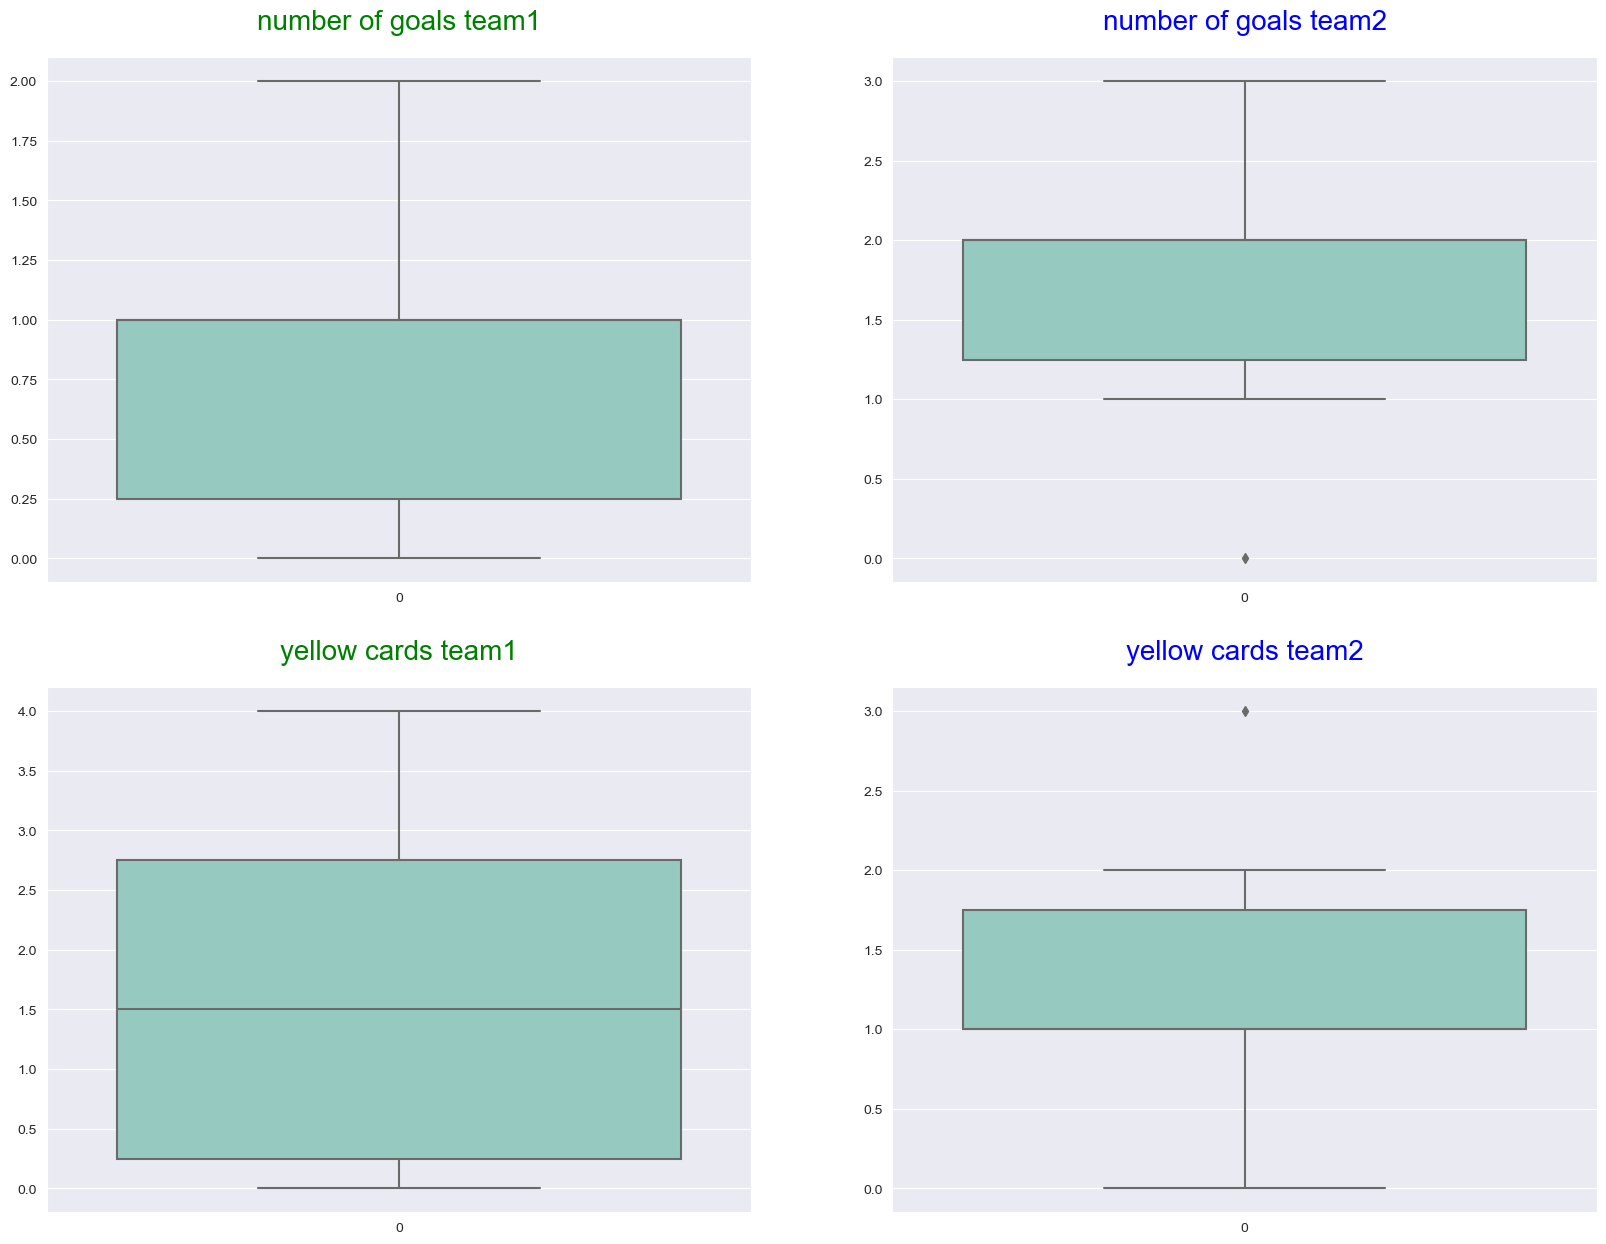

In [96]:
plt.figure(figsize=[20,15])

sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(GroupA['number of goals team1']).set_title("number of goals team1", fontsize=20, color='Green', pad=20)


plt.subplot(2,2,2)
sns.boxplot(GroupA['number of goals team2']).set_title("number of goals team2", fontsize=20, color='Blue', pad=20)

plt.subplot(2,2,3)
# sns.distplot(GroupA['yellow cards team1'], color='g')
sns.boxplot(GroupA['yellow cards team1']).set_title("yellow cards team1", fontsize=20, color='Green', pad=20)

plt.subplot(2,2,4)
# sns.distplot(GroupA['EXT_SOURCE_3'], color='g')
sns.boxplot(GroupA['yellow cards team2']).set_title("yellow cards team2", fontsize=20, color='Blue', pad=20)

plt.show()

In [97]:
max_values=df.groupby(['category'], sort=True).max()
max_values

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Group A,SENEGAL,SENEGAL,54,50,8%,2,3,2022-11-29,17 : 00,14,15,3,2,2,3,1,0,1,2,4,5,8,8,10,11,7,5,25,26,9,7,8,6,11,7,21,20,785,574,157,136,322,276,306,229,16,14,185,184,165,113,22,22,15,12,4,3,0,0,23,15,4,4,795,511,740,445,12,10,6,7,19,24,0,1,15,15,85,73,319,322
Group B,WALES,WALES,72,58,9%,6,3,2022-11-29,20 : 00,13,21,3,6,6,2,0,1,6,2,7,7,4,7,10,13,6,14,18,12,5,7,8,7,11,12,13,17,1061,777,207,140,386,310,468,327,16,17,238,185,178,133,25,27,16,16,4,2,1,0,16,15,2,2,809,588,730,529,13,8,8,7,16,17,0,1,21,13,89,84,328,416
Group C,SAUDI ARABIA,SAUDI ARABIA,64,67,9%,2,2,2022-11-30,20 : 00,14,25,2,2,2,2,1,1,2,2,6,13,8,9,10,21,4,15,20,25,6,8,5,7,8,10,27,26,650,907,157,194,244,282,316,450,26,22,191,214,127,188,39,33,25,19,6,6,0,0,20,21,10,6,610,862,529,814,9,13,9,9,23,22,1,0,26,15,82,80,438,361
Group D,TUNISIA,TUNISIA,56,60,9%,4,1,2022-11-30,20 : 00,22,14,1,4,4,1,1,0,4,1,7,3,9,7,18,11,5,5,30,27,8,6,7,5,8,7,19,25,710,640,166,171,291,268,359,322,26,17,200,241,136,172,32,23,27,17,3,3,0,0,16,15,3,3,734,650,672,567,11,14,11,9,15,19,0,0,14,22,90,88,400,316
Group E,SPAIN,SPAIN,74,78,9%,7,4,2022-12-01,20 : 00,25,32,4,7,7,4,1,0,4,4,9,11,11,17,15,24,10,8,30,30,9,13,14,13,6,12,21,22,1085,1138,199,217,418,286,487,678,23,28,276,193,233,159,34,34,22,25,3,3,0,0,22,14,4,7,1061,1070,1003,992,9,9,6,14,18,22,1,0,32,26,85,101,637,585
Group F,MOROCCO,MOROCCO,56,57,13%,4,2,2022-12-01,20 : 00,13,21,2,4,3,2,1,1,4,2,10,4,6,12,9,16,5,7,23,18,8,6,6,8,6,5,12,20,732,626,189,140,338,279,377,330,17,15,204,201,159,134,24,26,17,14,4,2,0,0,17,14,4,4,671,667,598,592,18,14,9,5,18,18,0,0,21,13,87,78,391,360
Group G,SWITZERLAND,SWITZERLAND,53,56,9%,3,3,2022-12-02,20 : 00,24,19,3,3,3,3,0,1,3,3,10,7,9,11,11,14,13,5,19,20,12,12,11,16,7,7,20,18,727,643,154,145,275,328,308,228,16,11,184,184,134,145,22,22,13,12,7,4,1,0,18,17,3,4,585,548,526,491,7,9,11,11,18,18,0,0,20,24,85,82,321,344
Group H,URUGUAY,URUGUAY

<function matplotlib.pyplot.show(close=None, block=None)>

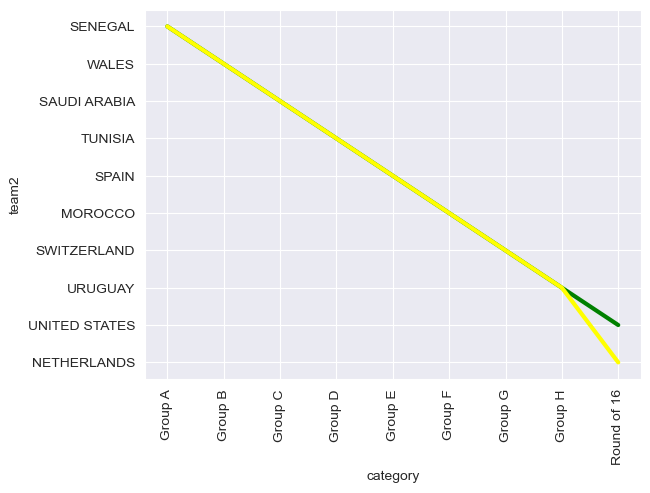

In [100]:
#top performing country per category
sns.lineplot(x="category",y="team2",data=max_values,c = 'Green',linewidth = '3')
sns.lineplot(x="category",y="team1",data=max_values,c = 'Yellow',linewidth = '3')
plt.xticks(rotation = 90)
plt.show

In [101]:
min_values=df.groupby(['category'], sort=True).min()
min_values

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,assists team1,assists team2,on target attempts team1,on target attempts team2,off target attempts team1,off target attempts team2,attempts inside the penalty area team1,attempts inside the penalty area team2,attempts outside the penalty area team1,attempts outside the penalty area team2,left channel team1,left channel team2,left inside channel team1,left inside channel team2,central channel team1,central channel team2,right inside channel team1,right inside channel team2,right channel team1,right channel team2,total offers to receive team1,total offers to receive team2,inbehind offers to receive team1,inbehind offers to receive team2,inbetween offers to receive team1,inbetween offers to receive team2,infront offers to receive team1,infront offers to receive team2,receptions between midfield and defensive lines team1,receptions between midfield and defensive lines team2,attempted line breaks team1,attempted line breaks team2,completed line breaksteam1,completed line breaks team2,attempted defensive line breaks team1,attempted defensive line breaks team2,completed defensive line breaksteam1,completed defensive line breaks team2,yellow cards team1,yellow cards team2,red cards team1,red cards team2,fouls against team1,fouls against team2,offsides team1,offsides team2,passes team1,passes team2,passes completed team1,passes completed team2,switches of play completed team1,switches of play completed team2,corners team1,corners team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Group A,ECUADOR,ECUADOR,42,32,10%,0,0,2022-11-20,14 : 00,2,6,0,0,0,0,0,0,0,0,0,3,1,2,0,2,2,2,7,8,0,0,1,2,1,4,6,4,453,268,83,76,174,115,149,77,2,8,136,153,77,84,9,13,2,7,0,0,0,0,7,9,0,0,383,269,313,198,1,2,1,2,9,11,0,0,5,2,52,52,190,232
Group B,ENGLAND,ENGLAND,33,19,10%,0,0,2022-11-21,11 : 00,6,7,0,0,0,0,0,0,0,0,1,2,3,3,1,5,1,2,7,3,1,0,2,1,0,1,4,0,388,212,71,53,138,86,175,73,1,4,104,101,55,45,4,7,1,4,0,0,0,0,9,9,1,0,325,224,261,154,1,2,1,0,10,10,0,0,7,6,49,56,139,167
Group C,ARGENTINA,ARGENTINA,24,24,12%,0,0,2022-11-22,11 : 00,4,3,0,0,0,0,0,0,0,0,0,1,2,0,2,1,0,0,5,3,2,1,1,1,2,2,3,8,328,268,62,69,126,101,75,68,2,3,117,127,66,66,5,12,1,2,0,1,0,0,6,11,0,0,297,267,197,190,1,1,1,2,12,5,0,0,4,4,61,48,163,141
Group D,AUSTRALIA,AUSTRALIA,24,31,12%,0,0,2022-11-22,11 : 00,5,4,0,0,0,0,0,0,0,0,3,1,2,3,2,2,3,2,9,9,2,2,2,2,0,1,10,6,302,342,88,89,114,120,100,114,8,7,153,133,81,84,16,10,7,4,0,0,0,0,4,6,0,0,286,334,187,239,1,1,2,1,8,5,0,0,4,6,64,56,217,161
Group E,COSTA RICA,COSTA RICA,14,17,11%,0,0,2022-11-23,11 : 00,6,0,0,0,0,0,0,0,0,0,3,0,1,0,3,0,2,0,2,3,3,0,1,1,1,0,1,1,315,250,77,52,106,104,88,94,5,1,104,113,57,58,13,4,7,0,0,0,0,0,3,6,0,2,225,231,167,170,2,1,0,0,8,7,0,0,0,6,46,49,164,150
Group F,BELGIUM,BELGIUM,32,32,10%,0,0,2022-11-23,11 : 00,5,6,0,0,0,0,0,0,0,0,0,2,0,2,3,2,1,2,6,6,1,0,2,2,0,1,3,5,498,441,106,78,193,173,188,159,4,6,142,125,81,85,10,11,3,6,0,0,0,0,7,5,0,0,360,317,290,275,3,4,0,1,8,10,0,0,7,7,38,47,194,217
Group G,BRAZIL,BRAZIL,31,34,11%,1,0,2022-11-24,11 : 00,7,4,0,1,1,0,0,0,1,0,3,0,2,1,5,1,1,1,5,7,2,3,4,3,4,1,9,7,397,414,88,67,144,185,165,155,7,4,144,140,78,91,10,15,5,4,0,1,0,0,7,10,0,0,295,403,239,325,4,2,2,0,11,8,0,0,4,7,64,54,236,226
Group H,GHANA,GHANA,34,32,10%,0,0,2022-11-24,14 : 00,9,6,0,0,0,0,0,0,0,0,0,0,3,3,4,1,3,1,9,7,4,0,4,4,2,3,7,3,470,389,93,72,155,155,191,143,4,5,139,122,87,66,11,12,5,4,1,0,0,0,7,9,1,0,359,319,304,260,3,2,3,2,10,8,0,

<function matplotlib.pyplot.show(close=None, block=None)>

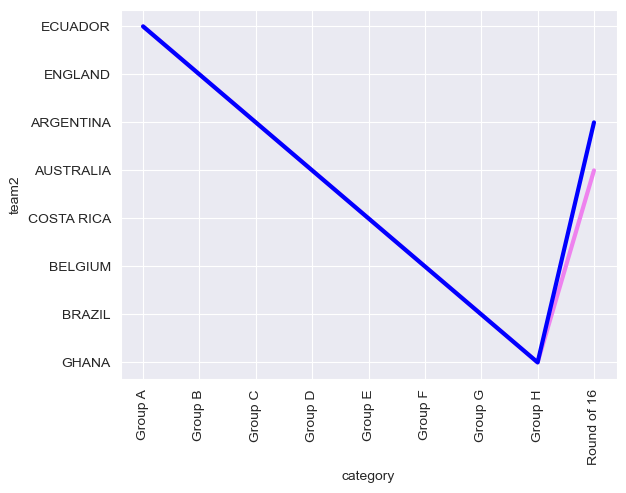

In [102]:
sns.lineplot(x="category",y="team2",data=min_values,c = 'violet',linewidth = '3')
sns.lineplot(x="category",y="team1",data=min_values,c = 'blue',linewidth = '3')
plt.xticks(rotation = 90)
plt.show

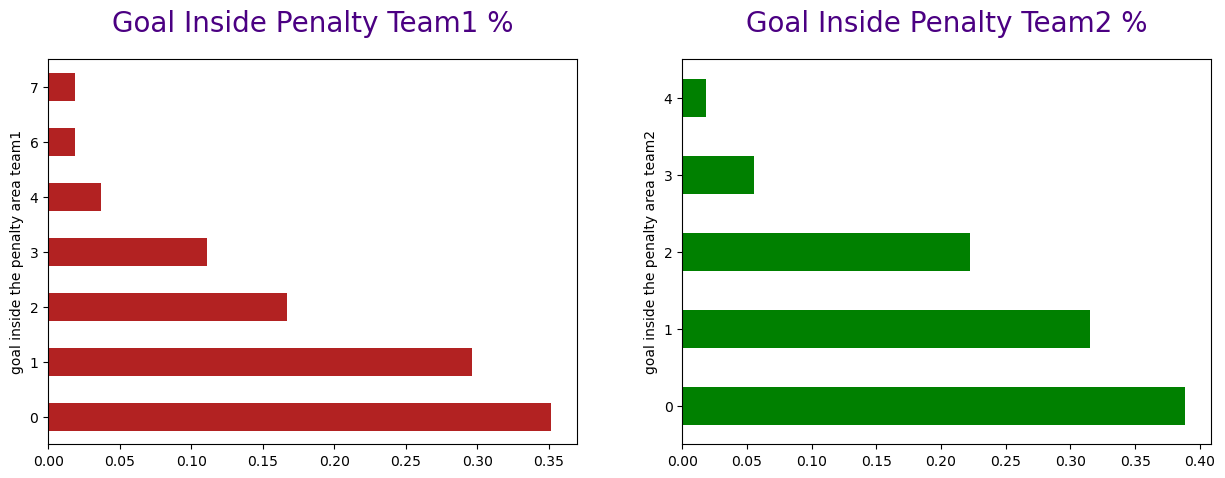

In [33]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
df['goal inside the penalty area team1'].value_counts(normalize=True).plot.barh(color='firebrick').set_title("Goal Inside Penalty Team1 %",
                                                                                               fontsize=20, color='indigo', pad=20)

plt.subplot(1,2,2)
df['goal inside the penalty area team2'].value_counts(normalize=True).plot.barh(color='green').set_title("Goal Inside Penalty Team2 %",
                                                                                           fontsize=20, color='indigo', pad=20)


plt.show()

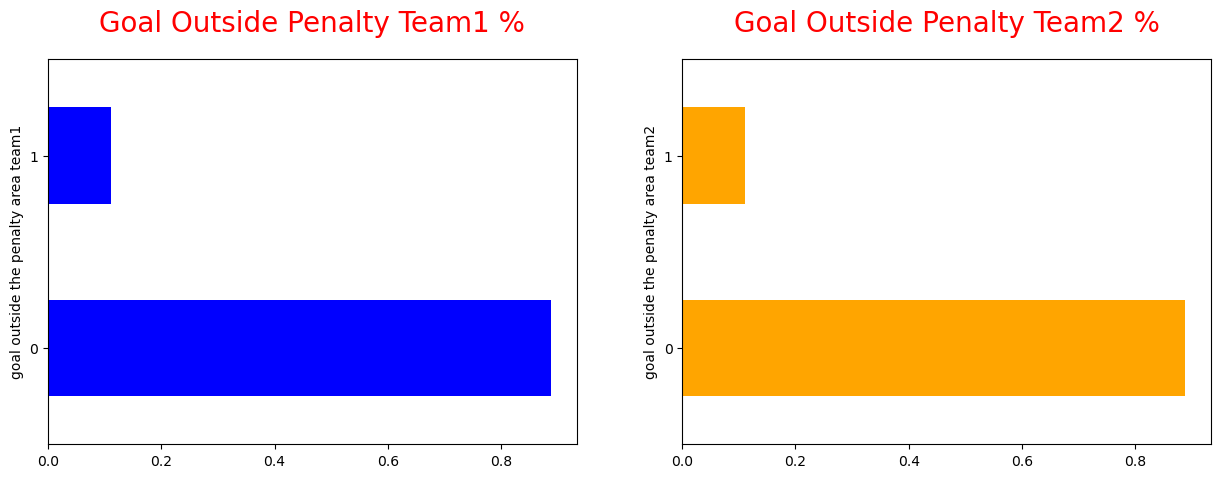

In [35]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
df['goal outside the penalty area team1'].value_counts(normalize=True).plot.barh(color='Blue').set_title("Goal Outside Penalty Team1 %",
                                                                                               fontsize=20, color='Red', pad=20)

plt.subplot(1,2,2)
df['goal outside the penalty area team2'].value_counts(normalize=True).plot.barh(color='Orange').set_title("Goal Outside Penalty Team2 %",
                                                                                           fontsize=20, color='Red', pad=20)
plt.show()

In [ ]:
## Report